<a href="https://colab.research.google.com/github/AnastasiaBrinati/machine_learning/blob/main/excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
# Executed as:
# python deliverable.py <path to training file> <path_to_test_file>
import numpy as np
import pandas as pd
import sys

In [327]:
# DA CANCELLARE: NON VA NEL FILE PYTHON
train_file = "hotel_train.csv"

In [328]:
x = pd.read_csv(train_file)
print(x.shape)

(95512, 30)


In [329]:
# 'Estraiamo' ora la colonna target, perchè dobbiamo fare lo split,
# ma il pop lo rimandiamo a seguito della gestione dei valori mancanti fatta ** sulle righe **
y = x['is_canceled']
#y = x.pop('is_canceled') # this is the target column
print(y.shape)

(95512,)


In [330]:
# ------------------------------------------------------------------- TRAIN / TEST SPLIT -----------------------------------------------------------------------------
#estrazione del validation set
from sklearn.model_selection import train_test_split

# seed = 12345
seed = 23456
# seed = 34567
# seed = 45678
# seed = 56789

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.3, random_state=seed, stratify=y)

print(x_tr.shape)
print(y_tr.shape)
print(x_ts.shape)
print(y_ts.shape)

print(np.unique(y, return_counts=True)[1]/len(y))
print(np.unique(y_tr, return_counts=True)[1]/len(y_tr))
print(np.unique(y_ts, return_counts=True)[1]/len(y_ts))

(66858, 30)
(66858,)
(28654, 30)
(28654,)
[0.62958581 0.37041419]
[0.62958808 0.37041192]
[0.62958051 0.37041949]


In [331]:
#-------------------------------------------------------------- SOSTITUZIONE VALORI MANCANTI --------------------------------------------------------------

# i valori nan della colonna 'children' sono solo 4, dunque è preferibile direttamente eliminare
# quelle righe invece di introdurre un lggero quanto inutile rumore
x_tr_drop = x_tr.dropna(subset=['children'])
y_tr = x_tr_drop.pop('is_canceled')
x_ts.pop('is_canceled')

print(x_tr_drop.shape)
print(y_tr.shape)
print(x_ts.shape)

(66855, 29)
(66855,)
(28654, 29)


<ipython-input-79-5d78c065fd7f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_tr_drop.corr(), ax=ax, annot=True)


<Axes: >

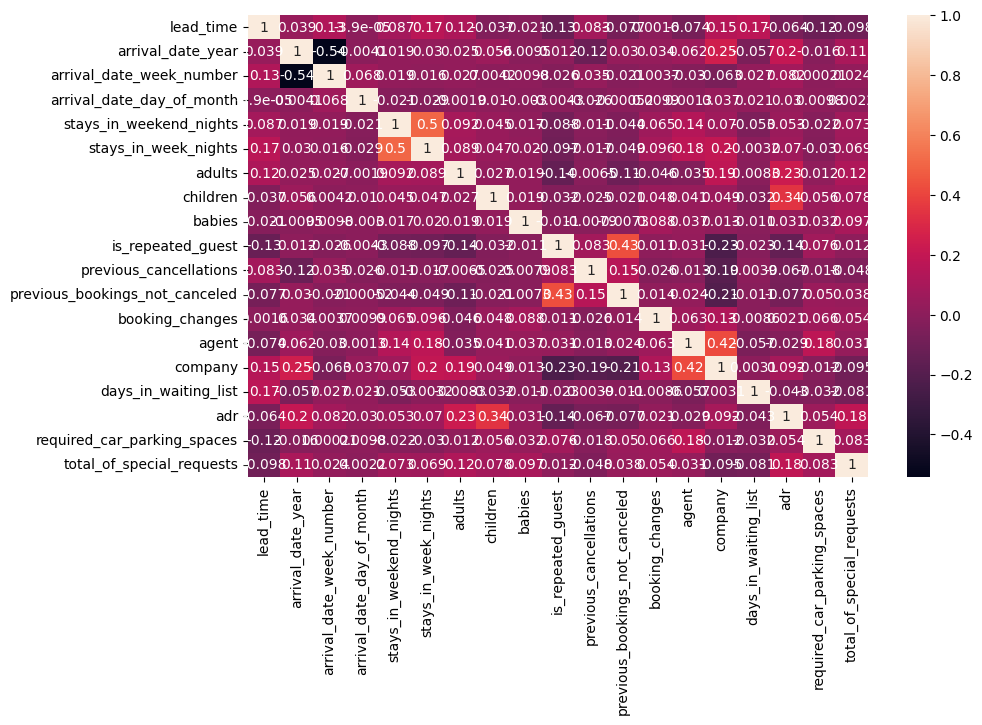

In [79]:
# --------------------------------------------------------------------- FEATURE IMPORTANCE: ------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(x_tr_drop.corr(), ax=ax, annot=True)

# da questo controllo possiamo notare come mediamente tutte le feature presentano
# lo stesso legame, con pochissime eccezioni,
# per cui non è stato applicato nessun procedimento in questa fase

In [332]:
#-------------------------------------------------------------- SOSTITUZIONE VALORI MANCANTI --------------------------------------------------------------

from sklearn.impute import SimpleImputer

# la colonna 'company' presenta un numero di righe molto inferiore rispetto al resto del dataset
# per questomotivo il rumore che verrebbe introdotto sarebbe grave
# la decisione ricade sull'eliminare direttamente la colonna
x_tr_drop = x_tr_drop.drop(columns='company')
x_tr_drop.info()

cols = list(x_tr_drop)
print(cols)


# sostituzione valori nan: dato che sono presenti valori categorici, e nello specifico sono proprio
# tre colonne di quel tipo ad avere valori mancanti, abbiamo optato per un semplice Imputer
# che sostituisse con i più frequenti.

imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
x_tr_notnan = imputer.fit_transform(x_tr_drop)


#pd.set_option('display.max_columns',None)
x = pd.DataFrame(x_tr_notnan)
x.columns=cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66855 entries, 91091 to 29896
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           66855 non-null  object 
 1   lead_time                       66855 non-null  int64  
 2   arrival_date_year               66855 non-null  int64  
 3   arrival_date_month              66855 non-null  object 
 4   arrival_date_week_number        66855 non-null  int64  
 5   arrival_date_day_of_month       66855 non-null  int64  
 6   stays_in_weekend_nights         66855 non-null  int64  
 7   stays_in_week_nights            66855 non-null  int64  
 8   adults                          66855 non-null  int64  
 9   children                        66855 non-null  float64
 10  babies                          66855 non-null  int64  
 11  meal                            66855 non-null  object 
 12  country                     

In [236]:
# csv obtained from: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
countries = pd.read_csv('all.csv')
print(countries['region'].unique())

a = countries[countries['alpha-3'].notnull()][countries['region'] == "Europe"]
europe = list(a['alpha-3'])
print(europe)
a = countries[countries['alpha-3'].notnull()][countries['region'] == "Africa"]
africa = list(a['alpha-3'])
print(africa)
a = countries[countries['alpha-3'].notnull()][countries['region'] == "Asia"]
asia = list(a['alpha-3'])
print(asia)
a = countries[countries['alpha-3'].notnull()][countries['region'] == "Oceania"]
oceania = list(a['alpha-3'])
print(oceania)
a = countries[countries['alpha-3'].notnull()][countries['region'] == "Americas"]
americas = list(a['alpha-3'])
print(americas)
a = countries[countries['region'].isnull()] # only 'ATA'
antartica = list(a['alpha-3'])
print(antartica)

['Asia' 'Europe' 'Africa' 'Oceania' 'Americas' nan]
['ALA', 'ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CZE', 'DNK', 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'GGY', 'VAT', 'HUN', 'ISL', 'IRL', 'IMN', 'ITA', 'JEY', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SJM', 'SWE', 'CHE', 'UKR', 'GBR']
['DZA', 'AGO', 'BEN', 'BWA', 'IOT', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM', 'COG', 'COD', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 'ETH', 'ATF', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MYT', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'REU', 'RWA', 'SHN', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ESH', 'ZMB', 'ZWE']
['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'CYP', 'GEO', 'HKG', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'PRK', 'KOR', 'KWT', 'KGZ', 

In [333]:
 #-------------------------------------------------------------------------- ENCODING --------------------------------------------------------------------------
class MyEncoder:
  def __init__(self, training_set):
    self.df_training = training_set

  def one_hot_encoding(self, df):

    # creo queste sei categorie e non lascio tutte le nazioni per evitare un numero di feature spropositato
    # solo in seguito procedo con one hot encoding
    df['country'] = df['country'].replace(europe,'Europe')
    df['country'] = df['country'].replace(asia,'Asia')
    df['country'] = df['country'].replace(americas,'Americas')
    df['country'] = df['country'].replace(africa,'Africa')
    df['country'] = df['country'].replace(antartica,'Antartica')
    df['country'] = df['country'].replace(oceania,'Oceania')
    df = pd.concat([df,pd.get_dummies(df['country'])],axis = 1,sort=False)
    df.drop('country', axis=1, inplace=True)

    # le specifiche sottolineano che esistono solamente due cateogorie per hotel: City Hotel e Resort Hotel
    df['hotel'] = df['hotel'].replace(['City Hotel'], '0')
    df['hotel'] = df['hotel'].replace(['Resort Hotel'], '1')

    # one hot encoding sui 12 mesi dell'anno
    df = pd.concat([df,pd.get_dummies(df['arrival_date_month'])],axis = 1,sort=False)
    df.drop('arrival_date_month', axis=1, inplace=True)

    # le specifiche sottolineano che esistono solamente quattro cateogorie per customer_type: Contract, Group, Transient, Transient-party
    df = pd.concat([df,pd.get_dummies(df['customer_type'])],axis = 1,sort=False)
    df.drop('customer_type', axis=1, inplace=True)

    # le specifiche sottolineano che esistono solamente tre cateogorie per customer_type: Refundable, Non Refund, No-deposit
    df = pd.concat([df,pd.get_dummies(df['deposit_type'])],axis = 1,sort=False)
    df.drop('deposit_type', axis=1, inplace=True)

    # dal momento che il motivo per cui la stanza assegnata è differente dalla stanza prenotata
    # potrebbe essere overbooking o richiesta del cliente, l'unica informazione che abbiamo deciso di
    # conservare è se la stanza è stata modificata o meno, riducendo ad una feaure
    # le specifiche sottolineano che esistono solamente due cateogorie per hotel: City Hotel e Resort Hotel
    df['reserved_room_type'] = np.where(df['assigned_room_type'] != df['reserved_room_type'], 1, df['reserved_room_type'])
    df['reserved_room_type'] = np.where(df['assigned_room_type'] == df['reserved_room_type'], 0, df['reserved_room_type'])
    df.rename(columns={"reserved_room_type": "changed_reserved_room"})
    df.drop('assigned_room_type', axis=1, inplace=True)

    # sostituisco nella colonna 'Meal' tutti gli 'Undefined' con 'SC', poichè le specifiche suggeriscono che si tratta
    # della stessa opzione; le categorie totali sono dunque 4: SC (/Undefined), BB, HB, FB
    df['meal'] = df['meal'].replace(['Undefined'], 'SC')
    df = pd.concat([df,pd.get_dummies(df['meal'])],axis = 1,sort=False)
    df.drop('meal', axis=1, inplace=True)

    # nel caso delle colonne market_segment e distribution_channel si hanno meno informazioni,
    # per cui non si è potuto ragionare troppo su come interpretare le due colonne..
    #
    #             ****************** market segment: how you get potential customers to consider buying what you sell *****************
    #             ****************** distribution channel: how you get your products in front of potential customers   ****************
    #
    # fondiamo le due come abbiamo fatto per le stanze reserved e assigned
    df['market_segment'] = np.where(df['distribution_channel'] != df['market_segment'], 1, df['market_segment'])
    df['market_segment'] = np.where(df['distribution_channel'] == df['market_segment'], 0, df['market_segment'])
    #df.rename(columns={"market_segment": "changed_reserved_room"})
    df.drop('distribution_channel', axis=1, inplace=True)

    return  df

  def fit_transform(self, train_set):
    tr_set = self.one_hot_encoding(train_set)
    self.df_training = tr_set
    return self.df_training
  def align(self, test_set):
    x_tr_alligned, x_ts_alligned = self.df_training.align(test_set, join="outer", axis=1,fill_value=0)
    #x_ts_alligned = x_ts_alligned.reindex(cols_encoded, axis=1)
    return x_ts_alligned
  def transform(self, test_set):
    test_set = self.one_hot_encoding(test_set)
    test_set = self.align(test_set)   # nel nostro caso specifico non necessario perchè sappiamo di avere tutte le features
    return test_set


In [334]:
from sklearn.preprocessing import OneHotEncoder

encoder = MyEncoder(np.nan)
#print(prova)
x_tr_encoded = x
x_tr_encoded = encoder.fit_transform(x_tr_encoded)
print(x_tr_encoded)
cols_encoded = list(x_tr_encoded)
print(cols_encoded)

## risultato : 23 ---> 51 columns

      hotel lead_time arrival_date_year arrival_date_week_number  \
0         0       167              2017                       31   
1         1         0              2016                       32   
2         0        43              2015                       27   
3         1         0              2017                        7   
4         0       116              2016                       10   
...     ...       ...               ...                      ...   
66850     0       179              2016                       36   
66851     0       122              2017                       19   
66852     0        17              2017                       18   
66853     1        12              2016                       16   
66854     0         0              2016                       10   

      arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights  \
0                             4                       0                    1   
1                      

In [203]:
# --------------------------------------------------------------------- FEATURE SELECTION -----------------------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
#
# Train the mode
#
forest = RandomForestClassifier()
forest.fit(x_tr_encoded, y_tr.ravel())
importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]


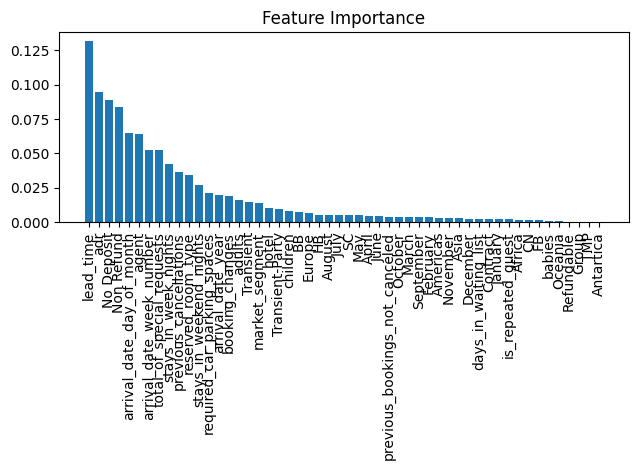

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Feature Importance')
plt.bar(range(x_tr_encoded.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_tr_encoded.shape[1]), x_tr_encoded.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Per ora non abbiamo effettuato tentativi in cui venivano eliminate direttamente feature,
# sicuramente un tentativo è possibile, ad esempio notiamo come tutte le feature dei Continenti evidenziate
# non presentino un impatto troppo grave

# strano è invece come 'days_in_waiting_list', 'previous_booking_not_canceled', e 'is_repeated_guest'
# non influiscano sul risultato; ci sono casi in cui guest abituali cambiano i piani

In [335]:
# -------------------------------------------------------------------------- SCALING --------------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
x_tr_scaled = scaler.fit_transform(x_tr_encoded)

# SPOSTA NELLA ROUTINE
# x_ts_scaled = scaler.transform(encoded_df_ts)

print("Media distribuzione di partenza: {}".format(np.mean(x_tr_encoded, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_tr_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_tr_encoded, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_tr_scaled, axis=0)))


# print("Media distribuzione di partenza: {}".format(np.mean(encoded_df_ts, axis=0)))
# print("Media distribuzione scalata: {}".format(np.mean(x_ts_scaled, axis=0)))

# print("Deviazione standard distribuzione di partenza: {}".format(np.std(encoded_df_ts, axis=0)))
# print("Deviazione standard distribuzione scalata: {}".format(np.std(x_ts_scaled, axis=0)))

Media distribuzione di partenza: hotel                                     inf
lead_time                          103.491332
arrival_date_year                 2016.154618
arrival_date_week_number            27.218308
arrival_date_day_of_month           15.799940
stays_in_weekend_nights              0.926034
stays_in_week_nights                 2.491093
adults                               1.857931
children                             0.104540
babies                               0.008541
market_segment                       0.856286
is_repeated_guest                    0.032548
previous_cancellations               0.086261
previous_bookings_not_canceled       0.142188
reserved_room_type                   0.126797
booking_changes                      0.220836
agent                               76.354932
days_in_waiting_list                 2.331060
adr                                101.641854
required_car_parking_spaces          0.062508
total_of_special_requests            0.572343
A

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [336]:
# SOLO PER PROVARE L'OVERSAMPLING
x_tr_oversampled = x_tr_scaled
y_tr_oversampled = y_tr

In [337]:
# --------------------------------------------------------------------- BALANCING: oversampling ---------------------------------------------------------------------
# data augmentation

# proviamo anche senza, perchè a quanto pare aggiunge davvero TANTO rumore

from imblearn.over_sampling import KMeansSMOTE

print(x_tr_oversampled.shape)

balancer = KMeansSMOTE(sampling_strategy=1, k_neighbors=5, kmeans_estimator=5)
x_tr_oversampled, y_tr_oversampled = balancer.fit_resample(x_tr_oversampled, y_tr_oversampled)

print(x_tr_oversampled.shape)

(66855, 52)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(84187, 52)


In [338]:
# ----------------------------------------------------------- ANOMALY DETECTION CON ISOLATION FOREST -------------------------------------------------------------------
from sklearn.ensemble import IsolationForest

# PER IL MOMENTO SENZA OVERSAMPLING

print("Initial distribution")
print(len(x_tr_scaled))
print(np.unique(y_tr, return_counts=True)[1]/len(y))

anomaly_detector = IsolationForest(n_estimators = 220, bootstrap = True, random_state = 42)
anomaly_detector.fit(x_tr_scaled)
is_inlier = anomaly_detector.predict(x_tr_scaled)

print(np.unique(is_inlier, return_counts=True))
x_tr_not_anomalous = x_tr_scaled[is_inlier==1,:]
y_tr_not_anomalous = y_tr[is_inlier==1]

print("Distribution after (not oversampling and) anomaly detection")
print(len(x_tr_not_anomalous))
print(np.unique(y_tr_not_anomalous, return_counts=True)[1]/len(y_tr_not_anomalous))

Initial distribution
66855
[0.44070902 0.25925538]
(array([-1,  1]), array([  974, 65881]))
Distribution after (not oversampling and) anomaly detection
65881
[0.62588607 0.37411393]


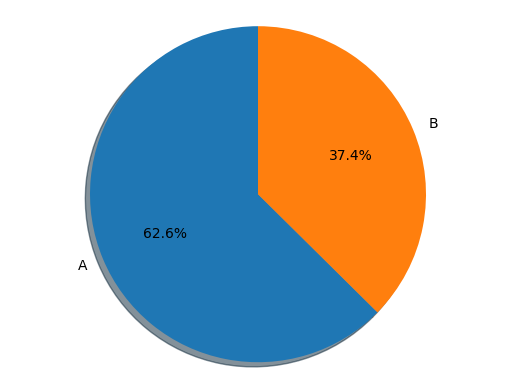

Size del dataset prima del sampler: 65881
Size del dataset dopo il sampler: 49294


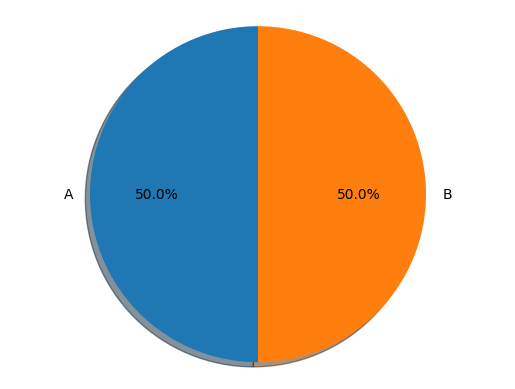

In [339]:
# ------------------------------------------------------------------ BALANCING: undersampling ---------------------------------------------------------------------------------

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

n_classes = len(np.unique(y_tr_not_anomalous))
fig, ax = plt.subplots()
sizes = [len(y_tr_not_anomalous[y_tr_not_anomalous==i]) for i in range(n_classes)]
class_names = [chr(ord('A')+i) for i in range(n_classes)]

ax.pie(sizes, labels=class_names, autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()

sampler = RandomUnderSampler(sampling_strategy=1)
x_tr_undersampled, y_tr_undersampled = sampler.fit_resample(x_tr_not_anomalous, y_tr_not_anomalous)

print("Size del dataset prima del sampler: {}".format(x_tr_not_anomalous.shape[0]))
print("Size del dataset dopo il sampler: {}".format(x_tr_undersampled.shape[0]))

fig, ax = plt.subplots()
sizes = [len(y_tr_undersampled[y_tr_undersampled==i]) for i in range(n_classes)]
class_names = [chr(ord('A')+i) for i in range(n_classes)]

ax.pie(sizes, labels=class_names, autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()

In [ ]:
#   forse troppo....................

In [ ]:
# --------------------------------------------------------------------- K FOLD CROSS VALIDATION --------------------------------------------------------------------------

# estrarre in questo momento il validation set perchè poi il training set verrà ulteriormente
# manipolato con feature selection, scaling ed anomaly detection
# ma in realtà andrebbe fatta anche prima della gestione valori mancanti..............
x_folded = x_encoded

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True)        # returns a MetadataRequest encapsulating routing information.
for i, (train_index, test_index) in enumerate(kf.split(x_folded)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")


In [ ]:
# -------------------------------------------------------------------------------- PIPELINE --------------------------------------------------------------------------------------------------

# valori mancanti

# encoding

transformer = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy = 'most_frequent'),
    OneHotEncoder(handle_unknown='ignore'),
)

# feature sel

#scaling

# oversampl

# anomaly det

# undersampl

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (transformer, features)
)

x = x.drop('company')
x = preprocessor.fit_transform(x)



In [340]:
test = x_ts
print(cols)
x_ts_not = test.drop(columns='company')
x_ts_notnan = imputer.transform(x_ts_not)
x_ts_notnan = pd.DataFrame(x_ts_notnan)
x_ts_notnan.columns=cols
x_ts_encoded = encoder.transform(x_ts_notnan)
x_ts_encoded = x_ts_encoded.reindex(cols_encoded, axis=1)
x_ts_scaled = scaler.transform(x_ts_encoded)

['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [341]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from sklearn.ensemble import IsolationForest, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [342]:
x_tr = x_tr_undersampled
y_tr = y_tr_undersampled
x_ts = x_ts_scaled
y_ts = y_ts

In [343]:
def train_evaluate(model, x_tr, y_tr, x_ts, y_ts):
  model.fit(x_tr, y_tr)
  y_tr_pred = model.predict(x_tr)
  y_ts_pred = model.predict(x_ts)
  print("Accuracy on training set {}".format(accuracy_score(y_tr, y_tr_pred)))
  print("F1 score on training set {}".format(f1_score(y_tr, y_tr_pred)))
  print(confusion_matrix(y_tr, y_tr_pred))
  print("Accuracy on test set {}".format(accuracy_score(y_ts, y_ts_pred)))
  print("F1 score on test set {}".format(f1_score(y_ts, y_ts_pred)))
  print(confusion_matrix(y_ts, y_ts_pred))

In [320]:
# -------------------------------------------------------------------- CLASSICATION: SVM -------------------------------------------------------------------------------------

classifier = SVC(kernel='rbf', C = 0.1)
print("Training on scaled data")
train_evaluate(classifier, x_tr, y_tr, x_ts, y_ts)

classifier = SVC(kernel='rbf', C = 0.2)
print("Training on balanced data")
train_evaluate(classifier, x_tr, y_tr, x_ts, y_ts)

classifier = SVC(kernel='rbf', C = 0.1)
print("Training on not anomalous data")
train_evaluate(classifier, x_tr_not_anomalous, y_tr_not_anomalous, x_ts, y_ts)

Training on scaled data
Accuracy on training set 0.7490825313978143
F1 score on training set 0.7252227109334882
[[20500  4024]
 [ 8283 16241]]
Accuracy on test set 0.7669784323305646
F1 score on test set 0.6751325840509902
[[15039  3001]
 [ 3676  6938]]
Training on balanced data
Accuracy on training set 0.7568504322296525
F1 score on training set 0.7375902129906707
[[20361  4163]
 [ 7763 16761]]
Accuracy on test set 0.769700565366092
F1 score on test set 0.683880239520958
[[14917  3123]
 [ 3476  7138]]
Training on not anomalous data
Accuracy on training set 0.7454224977587334
F1 score on training set 0.4922722589247833
[[40935   352]
 [16402  8122]]
Accuracy on test set 0.7434913101137712
F1 score on test set 0.4842829076620825
[[17853   187]
 [ 7163  3451]]


Accuracy on training set 0.6856006816245385
F1 score on training set 0.5418859000886788
[[24630    17]
 [15481  9166]]
Accuracy on test set 0.768828086829064
F1 score on test set 0.5478498293515358
[[18017    23]
 [ 6601  4013]]


[Text(0.5607142857142857, 0.9166666666666666, 'x[46] <= 0.5\ngini = 0.5\nsamples = 49294\nvalue = [24647, 24647]'),
 Text(0.32142857142857145, 0.75, 'x[14] <= 0.5\ngini = 0.481\nsamples = 41255\nvalue = [24623, 16632]'),
 Text(0.15714285714285714, 0.5833333333333334, 'x[1] <= -0.426\ngini = 0.494\nsamples = 36348\nvalue = [20115, 16233]'),
 Text(0.08571428571428572, 0.4166666666666667, 'x[19] <= 0.5\ngini = 0.288\nsamples = 5618\nvalue = [4636, 982]'),
 Text(0.05714285714285714, 0.25, 'x[12] <= 0.5\ngini = 0.315\nsamples = 5023\nvalue = [4041, 982]'),
 Text(0.02857142857142857, 0.08333333333333333, 'gini = 0.303\nsamples = 4866\nvalue = [3960, 906]'),
 Text(0.08571428571428572, 0.08333333333333333, 'gini = 0.499\nsamples = 157\nvalue = [81, 76]'),
 Text(0.11428571428571428, 0.25, 'gini = 0.0\nsamples = 595\nvalue = [595, 0]'),
 Text(0.22857142857142856, 0.4166666666666667, 'x[12] <= 0.5\ngini = 0.5\nsamples = 30730\nvalue = [15479, 15251]'),
 Text(0.17142857142857143, 0.25, 'x[19] <= 0

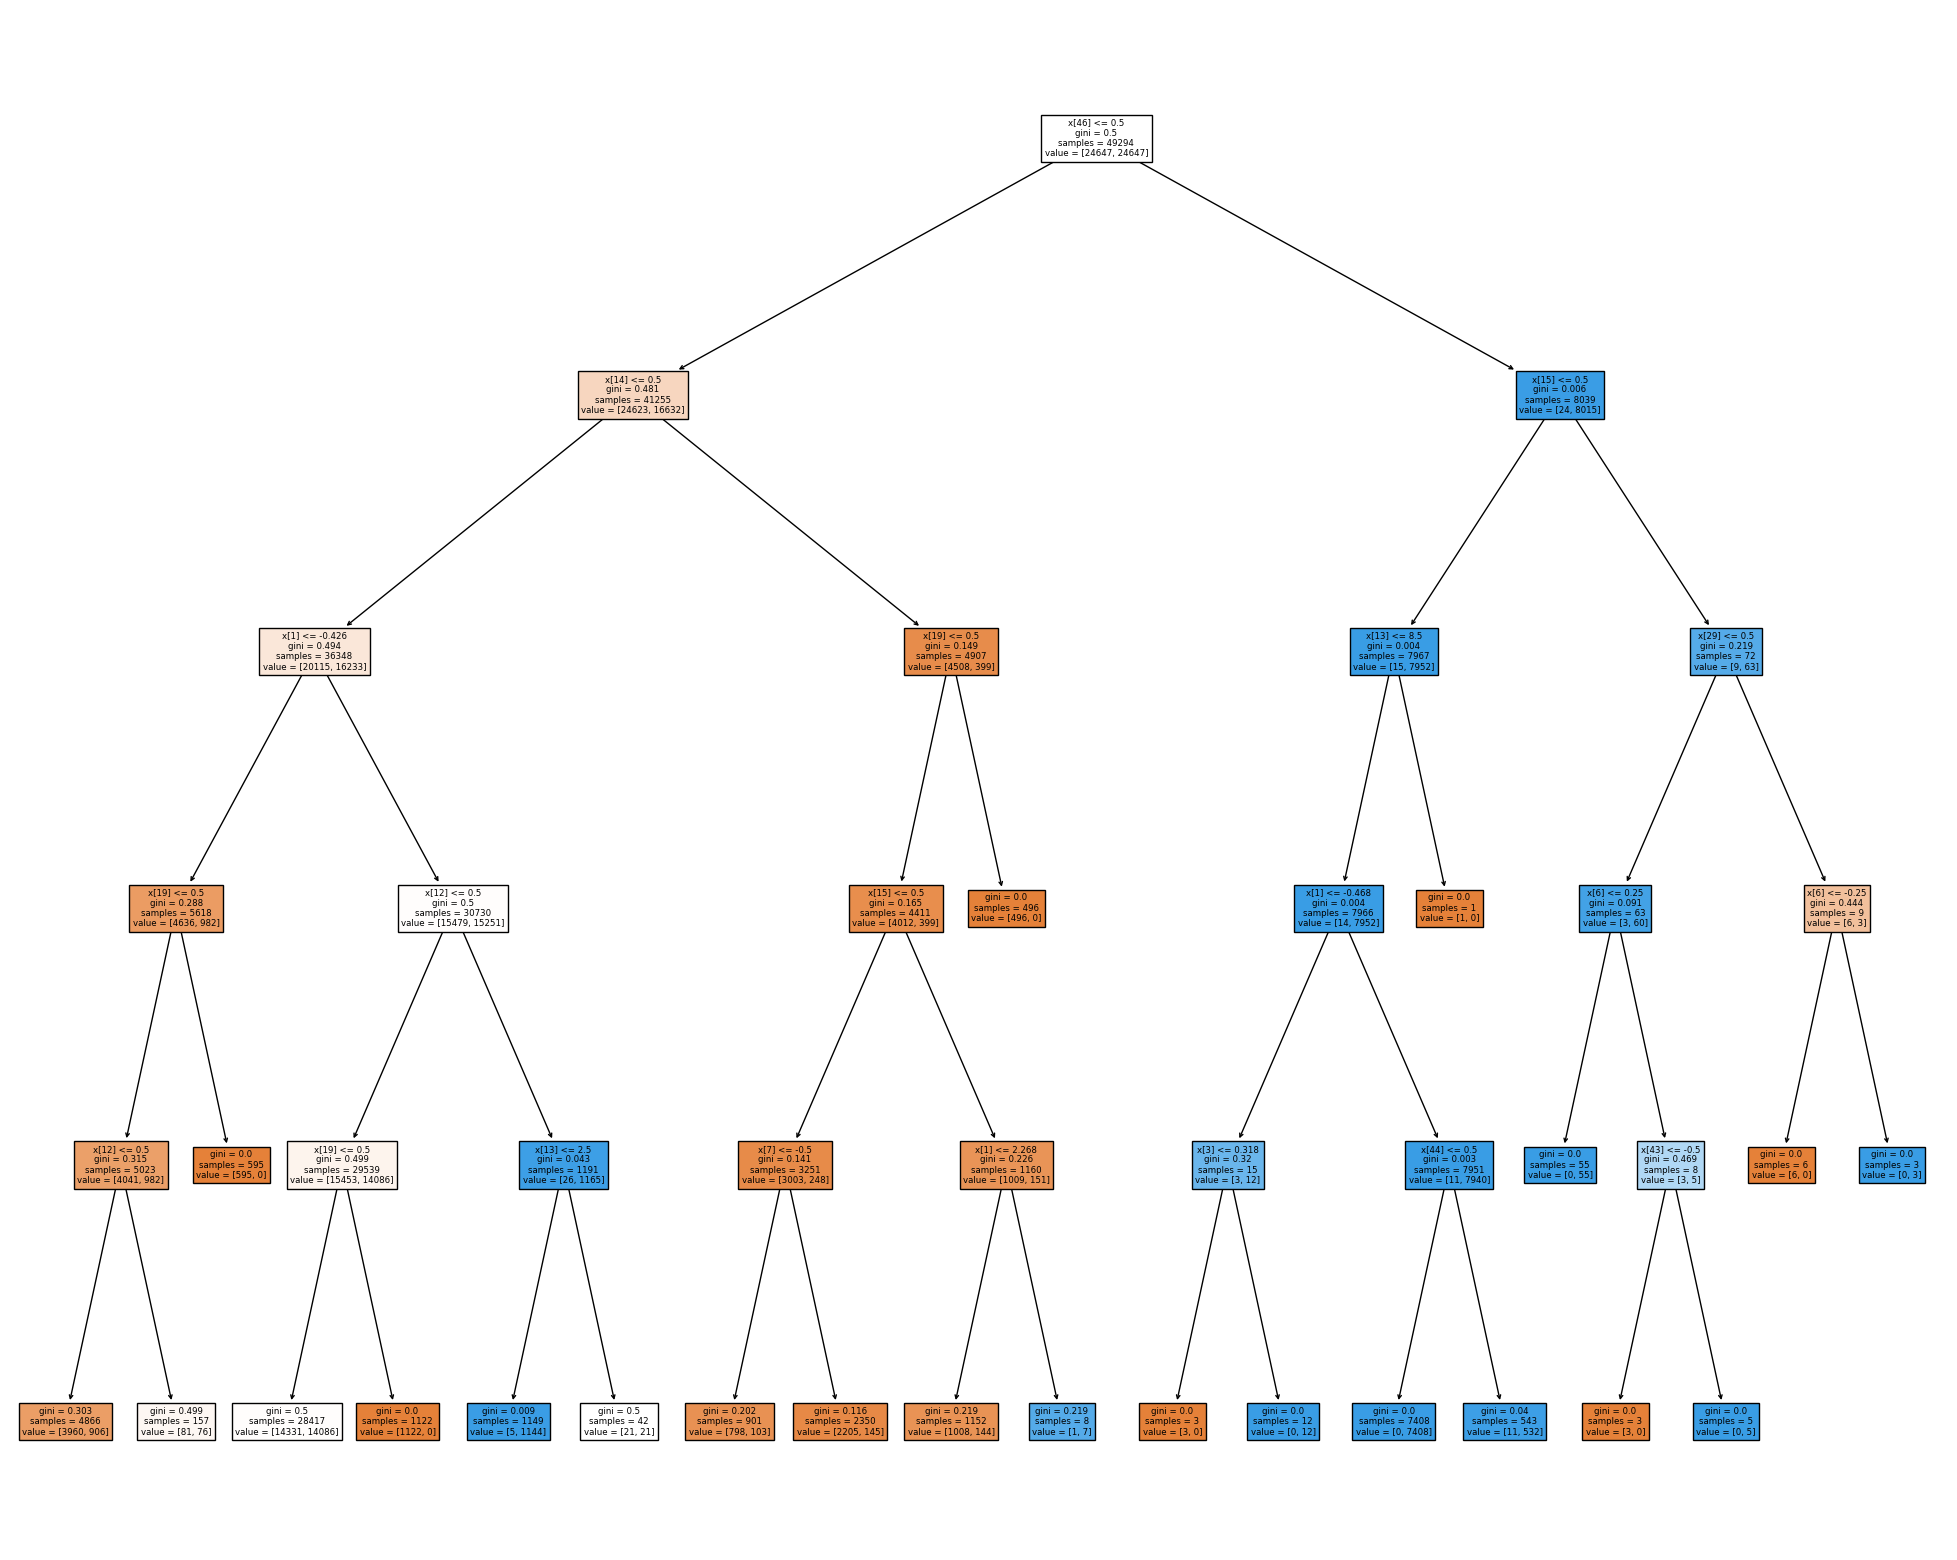

In [344]:
# -------------------------------------------------------------- CLASSIFICATION: DECISION TREES -------------------------------------------------------------------------------

classifier = DecisionTreeClassifier(criterion="gini", max_depth=5)
train_evaluate(classifier, x_tr, y_tr, x_ts, y_ts)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier, filled=True)

In [345]:
# CLASSIFICATION: METODI ENSEMBLE

print("******* GradientBoostingClassifier:")
classifier3 = GradientBoostingClassifier(max_depth=5, n_estimators=225,loss='exponential')
train_evaluate(classifier3, x_tr, y_tr, x_ts, y_ts)

print("******* GradientBoostingClassifier: oversampled")
classifier3 = GradientBoostingClassifier(max_depth=5, n_estimators=225,loss='exponential')
train_evaluate(classifier3, x_tr_oversampled, y_tr_oversampled, x_ts, y_ts)

print("******* GradientBoostingClassifier: not anomalous")
classifier3 = GradientBoostingClassifier(max_depth=5, n_estimators=225,loss='exponential')
train_evaluate(classifier3, x_tr_not_anomalous, y_tr_not_anomalous, x_ts, y_ts)

******* GradientBoostingClassifier:
Accuracy on training set 0.8440986732665233
F1 score on training set 0.8401323042998896
[[21416  3231]
 [ 4454 20193]]
Accuracy on test set 0.8346827668039366
F1 score on test set 0.7832532601235416
[[15358  2682]
 [ 2055  8559]]
******* GradientBoostingClassifier: oversampled
Accuracy on training set 0.8831411025455237
F1 score on training set 0.8770280742981426
[[39267  2826]
 [ 7012 35082]]
Accuracy on test set 0.8457457946534516
F1 score on test set 0.7730540151981926
[[16706  1334]
 [ 3086  7528]]
******* GradientBoostingClassifier: not anomalous
Accuracy on training set 0.8539336075651554
F1 score on training set 0.7867006538845173
[[38512  2722]
 [ 6901 17746]]
Accuracy on test set 0.8459551895023383
F1 score on test set 0.7735945835043085
[[16699  1341]
 [ 3073  7541]]


In [346]:
from sklearn.linear_model import SGDClassifier
print("******* SGDClassifier: ")
classifier4 = SGDClassifier(loss="log_loss", alpha=0.01, penalty=None, random_state=0)
train_evaluate(classifier4, x_tr, y_tr, x_ts, y_ts)

print("******* SGDClassifier: oversampled")
classifier5 = SGDClassifier(loss="log_loss", alpha=0.01, penalty=None, random_state=0)
train_evaluate(classifier5, x_tr_oversampled, y_tr_oversampled, x_ts, y_ts)

print("******* SGDClassifier: not anomalous")
classifier6 = SGDClassifier(loss="log_loss", alpha=0.01, penalty=None, random_state=0)
train_evaluate(classifier6, x_tr_not_anomalous, y_tr_not_anomalous, x_ts, y_ts)

******* SGDClassifier: 
Accuracy on training set 0.7653669817827727
F1 score on training set 0.7562795010114632
[[19783  4864]
 [ 6702 17945]]
Accuracy on test set 0.7823340545822572
F1 score on test set 0.7144100004578964
[[14616  3424]
 [ 2813  7801]]
******* SGDClassifier: oversampled
Accuracy on training set 0.8382648152327556
F1 score on training set 0.8216867469879519
[[39199  2894]
 [10722 31372]]
Accuracy on test set 0.800342011586515
F1 score on test set 0.6823255039147094
[[16789  1251]
 [ 4470  6144]]
******* SGDClassifier: not anomalous
Accuracy on training set 0.7985155052291253
F1 score on training set 0.679046375550075
[[38565  2669]
 [10605 14042]]
Accuracy on test set 0.799190339917638
F1 score on test set 0.6772854739203591
[[16862  1178]
 [ 4576  6038]]


In [ ]:
# DON'T RUN
assert(len(sys.argv)==3)
train_file, test_file = sys.argv[1:]

In [ ]:
# DON'T RUN
X_test = pd.read_csv(test_file) # will not contain the is_canceled column!
# The following line is only useful to debug the code on the training set:
if "is_canceled" in X_test.columns:
    X_test = X_test.drop(columns=['is_canceled'])

# x[x['agent'].notnull()][x['company'].notnull()]

In [ ]:
# DONT RUN

# la colonna 'country' ha 400 righe vuote, quindi forse serve un imputer
# KNN potrebbe essere utile poichè la colonna è categorica

# però per fare knn dovremmo prima convertire tutti i valori categorici in numerici

from sklearn.impute import KNNImputer

print("KNNImputer")
# per ora uniform, guardando solo i primi 5 vicini
imp = KNNImputer(missing_values=np.nan, n_neighbors=5, weights="uniform")
x_notnan = imp.fit_transform(x)
y_notnan = imp.transform(y)

print(x_notnan[np.isnan(x[:,0]),0][0:10])
print(y_notnan[np.isnan(y[:,0]),0][0:10])
x.info()

In [ ]:
# --------------------------------------------------------------------
predictions = model.predict(X_test)
print("#12345,23456") # nomi o matricole
for i in predictions:
    print(i)